In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from optimization.range.MethodSven import method_sven_iterations_list
from optimization.range.MethodSven import method_sven

from optimization.range.SearchDichotomous import search_method_dichotomous_iterations_list
from optimization.range.SearchDichotomous import search_dichotomous

from optimization.range.HalvingMethod import halving_method
from optimization.range.HalvingMethod import halving_method_iterations_list

from optimization.range.SearchGoldenSection import search_golden_section
from optimization.range.SearchGoldenSection import search_golden_section_iterations_list

from optimization.range.SearchPitchAdaptation import search_pitch_adaptation
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_list
from optimization.range.SearchPitchAdaptation import search_pitch_adaptation_iterations_label

from interpolition.ThreePointQuadratic import threePointQuadratic
from interpolition.ThreePointQuadratic import threePointQuadratic_list
from interpolition.ThreePointQuadratic import threePointQuadratic_label

from interpolition.CubicInterpolation import cubicInterpolation
from interpolition.CubicInterpolation import threePointQuadratic_list
from interpolition.CubicInterpolation import threePointQuadratic_label

In [4]:
x0 = 3.0
h = 2.0
n = 200

count_invoke = 0
f = lambda x: 20 * (x + 5).__pow__(2)
f_arr = lambda X: np.transpose([X, f(X)])

columns = ['x', 'y', 'h']
epsilon = 0.001
iter = 500

In [5]:
def print_iterations(iterations, f=None, range=None, columns=['x', 'y']):
    iterations = pd.DataFrame(iterations, columns=columns).reset_index(drop=True)
    if f is not None and range is not None:
        x = np.linspace(range[0], range[1])
        y = f(x)
        plt.plot(x, y)
    plt.plot(iterations['x'], iterations['y'])
    plt.plot([np.array(iterations['x'])[0], np.array(iterations['x'])[-1]],
             [np.array(iterations['y'])[0], np.array(iterations['y'])[-1]], 'y^')
    plt.show()
    return iterations


def print_with_sven(sven, starts, ends, start, end, f=None, range=None):
    if f is not None and range is not None:
        x = np.linspace(range[0], range[1])
        y = f(x)
        plt.plot(x, y)

    print('sven')
    print(sven)
    print('starts')
    print(starts)
    print('ends')
    print(ends)
    plt.plot(sven[0], sven[1], 'r-')
    plt.plot(starts[:, 0], starts[:, 1], color="blue")
    plt.plot(ends[:, 0], ends[:, 1], color="green")
    plt.plot(ends[:, 0], ends[:, 1], color="green")
    plt.plot([start[0], end[0]], [start[1], end[1]], 'y^')
    plt.show()


def concat_iter(arr0, arr1):
    arr0 = np.array(arr0)
    arr1 = np.array(arr1)
    columns = ['x', 'y', 'h']
    arr0 = pd.DataFrame(arr0[:, :3], columns=columns)
    arr1 = pd.DataFrame(arr1[:, :3], columns=columns)
    points = pd.concat([arr0, arr1])
    return points


def plot(X, Y):
    plt.plot(X, Y, 'r-')
    plt.plot()


def center(x, y):
    return (x + y) / 2

start
[-4.999653859456576, 2.396265516042936e-06]
[-5.000509565939458, 5.193148933115434e-06]
[-5.000081712698017, 1.335393003437688e-07]
start
[-4.999653859456576, 2.396265516042936e-06]
[-5.000509565939458, 5.193148933115434e-06]
[-5.000081712698017, 1.335393003437688e-07]
start
[-4.999653859456576, 2.396265516042936e-06]
[-5.000509565939458, 5.193148933115434e-06]
[-5.000081712698017, 1.335393003437688e-07]
start
[-4.999653859456576, 2.396265516042936e-06]
[-5.000509565939458, 5.193148933115434e-06]
[-5.000081712698017, 1.335393003437688e-07]


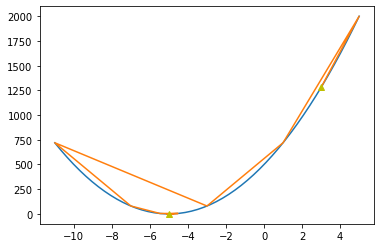

,x,y,h
0,3.000000,1.280000e+03,2.000000
1,5.000000,2.000000e+03,2.000000
2,1.000000,7.200000e+02,-2.000000
3,-3.000000,8.000000e+01,-4.000000
4,-11.000000,7.200000e+02,-8.000000
5,-7.000000,8.000000e+01,-11.000000
6,-5.472136,4.458247e+00,-7.944272
7,-4.527864,4.458247e+00,-6.055728
8,-5.111456,2.484496e-01,-6.055728
9,-4.750776,1.242248e+00,-5.334369


In [5]:
range = method_sven(x0, h, f, n)
range = search_golden_section(f, range[1], range[0], epsilon=epsilon, iter=iter)

start = [range[1], f(range[1])]
end = [range[0], f(range[0])]

center_x = center(start[0],end[0])
center_p = [center_x,f(center_x)]

result = threePointQuadratic(f, start, end,center_p , epsilon=epsilon, iter=iter)

points = concat_iter(method_sven_iterations_list, search_golden_section_iterations_list)
points = concat_iter(points, threePointQuadratic_list)
print_iterations(points, f=f, range=[-11, 5],
                 columns=columns)

In [13]:
range = method_sven(x0, h, f, n)
# cubicInterpolation()
method_sven_iterations_list[4:0:-1][::-1][,0:1]

SyntaxError: invalid syntax (3092309368.py, line 3)

In [24]:
np.array(method_sven_iterations_list)

array([[ 3.00e+00,  1.28e+03,  2.00e+00],
       [ 5.00e+00,  2.00e+03,  2.00e+00],
       [ 1.00e+00,  7.20e+02, -2.00e+00],
       [-3.00e+00,  8.00e+01, -4.00e+00],
       [-1.10e+01,  7.20e+02, -8.00e+00]])

In [14]:
method_sven_iterations_list[,0:1]

SyntaxError: invalid syntax (2109247758.py, line 1)

In [22]:
np.array(method_sven_iterations_list)[:,:2]

array([[ 3.00e+00,  1.28e+03],
       [ 5.00e+00,  2.00e+03],
       [ 1.00e+00,  7.20e+02],
       [-3.00e+00,  8.00e+01],
       [-1.10e+01,  7.20e+02]])